# Data Generation

Generation of synthetic data for a binary classification task.

Notes:
* Around 20-30 features
* Generate the instances with known covariance

### Manual data generation using numpy multivariate normal:

In [70]:
import numpy as np

In [71]:
mean = [0, 0]
cov = [[1, 0], [0, 100]]

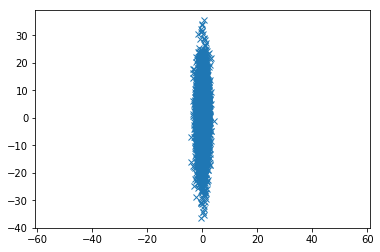

In [72]:
import matplotlib.pyplot as plt
x, y = np.random.multivariate_normal(mean,cov,5000).T
plt.plot(x, y, 'x')
plt.axis('equal')
plt.show()

## Data generation using scikit-learn's make_classification:

In [137]:
from sklearn.datasets import make_classification

Parameters for data generation:

In [61]:
n_samples = 10000
n_features = 20
n_informative = 10
n_redundant = 5
n_repeated = 3
n_classes = 2
n_clusters_per_class = 1
weights = [0.3, 0.7]
flip_y = 0
class_sep = 1.0
hypercube = True
shift = None
scale = None
shuffle = True
random_state = 42

In [74]:
X, y = make_classification(n_samples, n_features, n_informative, n_redundant,
                          n_repeated, n_classes, n_clusters_per_class,
                          weights, flip_y, class_sep, hypercube, shift, scale,
                          shuffle, random_state)

### Quick Inspection of the Data

In [63]:
import pandas as pd

In [64]:
index = range(n_samples)
columns = ["feature {}".format(i) for i in range(n_features)] + ["labels"]

In [65]:
data = pd.DataFrame(np.c_[X, y],index,columns)

In [66]:
data.head()

,feature 0,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,feature 7,feature 8,feature 9,...,feature 11,feature 12,feature 13,feature 14,feature 15,feature 16,feature 17,feature 18,feature 19,labels
0,-215.675762,-5.397570,352.643623,61.230588,0.349919,616.911184,-192.332643,-90.507621,-3.759702,-29.287066,...,-37.897696,39.802608,536.549018,44.986911,-490.671201,137.985445,-1.022769,-183.708831,8.088507,1.0
1,-83.113338,-72.389776,74.633569,231.054600,2.609283,145.223279,-47.429019,50.612961,-8.620894,-77.259645,...,15.078277,3.746954,192.232884,-0.097832,107.748838,133.488340,-4.693822,-124.184960,-29.886019,1.0
2,168.909792,55.367982,-44.620937,105.956966,-5.534693,-57.110799,287.272157,165.896071,-11.720201,392.746430,...,-38.811067,152.001231,-726.159813,-73.986953,-54.287747,-448.107716,-1.335007,-141.080134,42.533455,0.0
3,35.004202,156.948586,-171.391527,301.864120,-4.774521,-272.197098,0.368586,79.799697,-7.680100,-277.535125,...,77.084538,-49.578600,468.577049,6.121460,304.272968,176.627000,-1.025892,-98.368830,100.114412,1.0
4,-225.910410,-73.610672,404.510947,-52.888868,1.529157,704.912279,-253.833176,105.825344,14.019328,41.743410,...,-26.040275,16.376814,443.764354,13.477879,93.423501,159.588544,-2.439185,-311.216533,-30.578085,1.0


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
feature 0     10000 non-null float64
feature 1     10000 non-null float64
feature 2     10000 non-null float64
feature 3     10000 non-null float64
feature 4     10000 non-null float64
feature 5     10000 non-null float64
feature 6     10000 non-null float64
feature 7     10000 non-null float64
feature 8     10000 non-null float64
feature 9     10000 non-null float64
feature 10    10000 non-null float64
feature 11    10000 non-null float64
feature 12    10000 non-null float64
feature 13    10000 non-null float64
feature 14    10000 non-null float64
feature 15    10000 non-null float64
feature 16    10000 non-null float64
feature 17    10000 non-null float64
feature 18    10000 non-null float64
feature 19    10000 non-null float64
labels        10000 non-null float64
dtypes: float64(21)
memory usage: 1.6 MB


In [68]:
data.describe()

,feature 0,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,feature 7,feature 8,feature 9,...,feature 11,feature 12,feature 13,feature 14,feature 15,feature 16,feature 17,feature 18,feature 19,labels
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,-32.201653,41.512517,51.649813,90.835472,-0.696638,106.227712,30.593381,54.208920,2.459973,-11.586566,...,22.278842,15.298482,160.365481,-1.117411,118.138567,-1.337358,-3.154265,-186.764361,34.679486,0.70000
std,122.779445,117.479889,151.889098,97.956466,3.179275,257.703811,174.417445,68.868932,21.268115,193.078328,...,39.380383,88.479643,377.773268,67.078232,289.589568,159.211693,11.609890,175.219306,66.593465,0.45828
min,-476.645935,-388.993195,-568.487320,-247.007500,-12.702909,-945.932740,-566.179042,-207.813245,-91.084176,-811.570401,...,-98.728379,-319.243142,-1343.811037,-320.346863,-903.500962,-601.760312,-47.080068,-843.409483,-209.352642,0.00000
25%,-114.244425,-40.382801,-51.669672,25.321926,-2.840923,-69.070088,-86.047889,7.414874,-11.368568,-140.417990,...,-5.610353,-46.370641,-60.763271,-42.161957,-82.154211,-101.484490,-11.020097,-304.658732,-11.742869,0.00000
50%,-33.048513,40.604654,53.741935,90.967067,-0.649539,109.777328,19.000104,53.922876,2.489876,-23.150107,...,20.069272,13.721478,211.357800,2.094448,115.870262,5.710703,-3.009468,-187.880211,34.164864,1.00000
75%,50.948448,120.190204,153.028616,155.991519,1.439070,278.232841,135.785979,101.509535,16.540152,105.086293,...,48.619562,74.556252,428.681245,44.255315,314.413534,109.098682,4.895155,-68.384909,79.277927,1.00000
max,469.654036,445.169886,628.784069,499.740649,10.671798,1085.427003,836.519457,303.953432,102.130802,840.084355,...,172.016305,365.347417,1159.833452,220.241039,1225.811422,548.321923,35.226560,458.158072,263.492633,1.00000


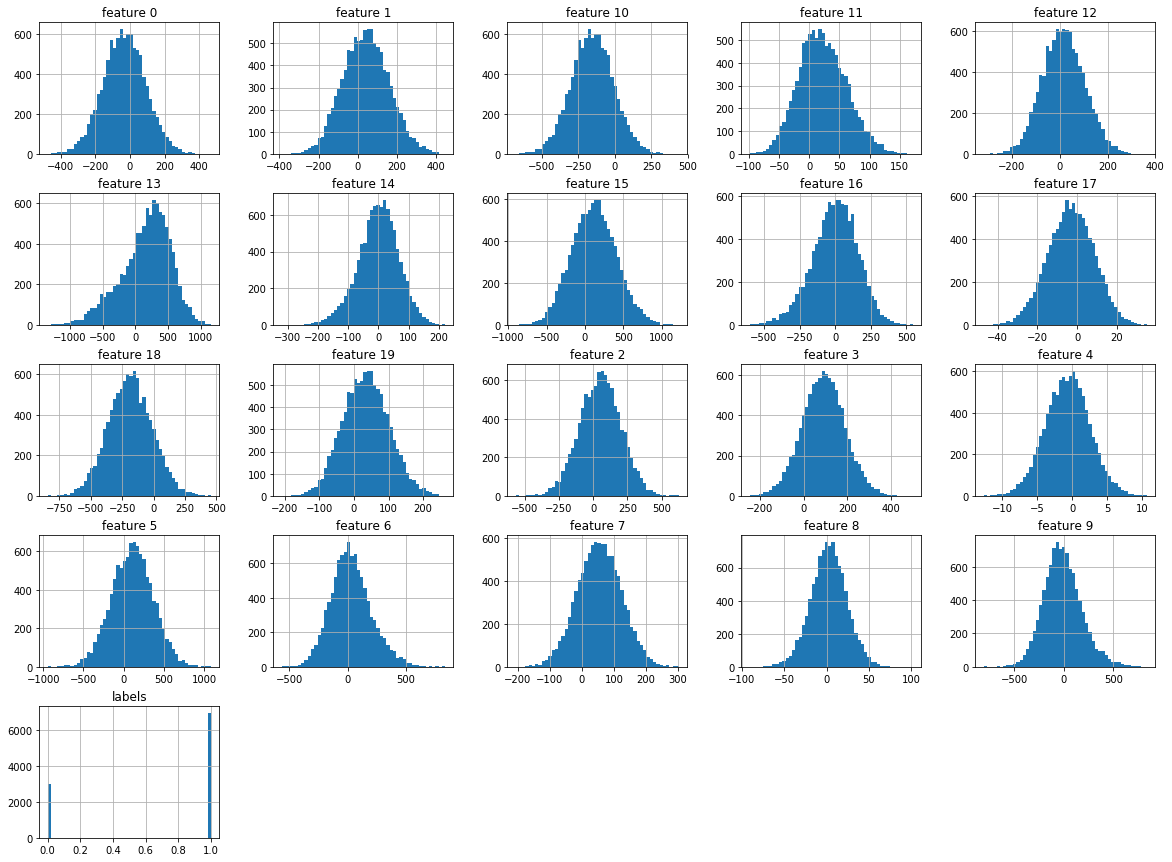

In [69]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
plt.show()

## Gradual data collection setting

In [76]:
batch_size = 100
feature_limit = 5

In [89]:
def feature_selection():
    return np.random.choice(n_features,size=feature_limit,replace=False)

In [94]:
n_batches = int(n_samples/batch_size)
for batch in range(n_batches):
    selected_features = feature_selection()
    X_batch = data[["feature {}".format(i) for i in selected_features]][batch*batch_size:(batch+1)*batch_size].copy()
    y_batch = data["labels"][batch*batch_size:(batch+1)*batch_size].copy()

In [95]:
X_batch

,feature 4,feature 18,feature 16,feature 11,feature 3
9900,-1.130881,-55.424009,102.450319,-5.069797,114.474583
9901,-4.530258,-236.531506,-5.118409,30.314079,58.487785
9902,3.791456,-217.365288,-34.328224,-27.872574,151.243076
9903,-5.225543,-166.698654,234.896491,-8.604449,63.202853
9904,-2.828248,-418.822802,-155.896759,8.574448,87.238308
...,...,...,...,...,...
9995,-2.726641,-188.881616,-107.547855,31.844897,-74.665190
9996,-0.157806,-262.378201,-3.126210,-19.148611,173.063423
9997,0.971398,-328.590342,-250.402032,-21.363905,176.770993
9998,-0.557430,-208.812497,-13.970919,74.814726,129.181254


## Discover, Visualize and Look for Correlations

Handling the first batch only

In [138]:
selected_features = feature_selection()
X_batch1 = data[["feature {}".format(i) for i in selected_features]][0:batch_size].copy()
y_batch1 = data[["labels"]][0:batch_size].copy()

In [129]:
data_b1 = pd.concat([X_batch1,y_batch1], axis=1)

In [130]:
data_b1.head()

,feature 5,feature 15,feature 12,feature 19,feature 13,labels
0,616.911184,-490.671201,39.802608,8.088507,536.549018,1.0
1,145.223279,107.748838,3.746954,-29.886019,192.232884,1.0
2,-57.110799,-54.287747,152.001231,42.533455,-726.159813,0.0
3,-272.197098,304.272968,-49.578600,100.114412,468.577049,1.0
4,704.912279,93.423501,16.376814,-30.578085,443.764354,1.0


In [132]:
corr_matrix = data_b1.corr()

In [133]:
corr_matrix["labels"].sort_values(ascending=False)

labels        1.000000
feature 13    0.780061
feature 19    0.573934
feature 15    0.318673
feature 5    -0.099871
feature 12   -0.477155
Name: labels, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002141DBD8A58>,
      dtype=object)

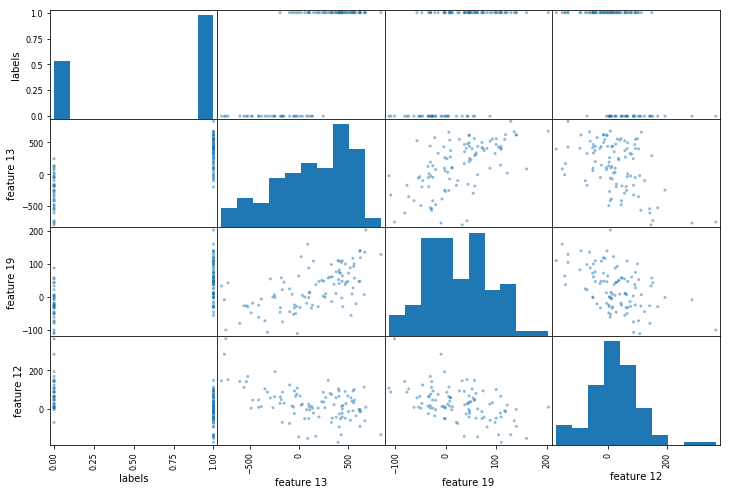

In [134]:
from pandas.plotting import scatter_matrix

attributes = ["labels", "feature 13", "feature 19", "feature 12"]
scatter_matrix(data_b1[attributes], figsize=(12,8))